# Contents <a class="anchor" id="main"></a>
* [Importing Libraries](#1)
* [Data Understanding](#2)
* [Data Cleaning](#3)
* [Feature Engineering](#4)
* [Train Test Split](#5)
* [Data Visualization](#6)


## Importing Libraries <a class="anchor" id="1"></a>


In [396]:
import pandas as pd
import numpy as np
import time
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [397]:
df = pd.read_excel('the_all.xlsx')
df = df.iloc[:, 1:]
df.head(5)

,Name,Date,Time,Category,Rating,Stars,Episodes,Seasons,Directeds,Scriptwriters,Release_years,Production_companies,Publisher_organization,Musics,Created_bys,Exported_countries
0,As If,2021–,30 min,Comedy,9.0,"Feyyaz Yigit,Kivanç Kilinç,Ahmet Kürsat Öçalan...",30.0,3 seasons,"Ömer Sinir,Onur Uzun","Aziz Kedi,Feyyaz Yigit",1 January 2021,Özcanlar Yapim Sarayi,Exxen,"Ersin Gok,Gurol Beser",Ercüment Orkut,Turkey
1,Sen Çal Kapimi,2020–2021,120 min,"Comedy, Romance",7.1,"Hande Erçel,Kerem Bürsin,Evrim Dogan,Anil Ilte",52.0,2 seasons,"Altan Dönmez,Ender Mihlar,Yusuf Pirhasan","Ayse Kutlu,Erdem Açikgöz,Yesim Citak,Dilek Iyi...",8 July 2020,MF Yapim,"Divinity,Fox TV,IVI,KINOPOISK,KION,Megafon Tv,...","Hakan Gencan,Özgür Demir,Ilker Erdogan",Aytekin Atas,"Italy,Poland,Turkey,Turkey,Ecuador,Egypt,Indon..."
2,Kurulus: Osman,2019–,120 min,"Action, Adventure, Drama",7.5,"Burak Özçivit,Özge Törer,Yigit Ucan,Buse Arslan",108.0,4 seasons,"Ahmet Yilmaz,Fethi Bayram,Metin Günay","Asli Zeynep Peker Bozdag,Asli Zeynep Peker Boz...",2019,"Bozdag Film,Tekden Film","ATV,Atv","Ömer Faruk Karacan,Efe Kubilay,Turgay Aksoy","Zeynep Alasya,Alpay Göltekin","Turkey,Spain,Poland,Turkey,United Arab Emirate..."
3,Dirilis: Ertugrul,2014–2019,120 min,"Action, Adventure, Drama",7.9,"Engin Altan Düzyatan,Hülya Darcan,Cengiz Cosku...",179.0,5 seasons,"Metin Günay,Akif Özkan,Hakan Arslan","Mehmet Bozdag,Mehmet Bozdag,Atilla Engin,Atill...",10 December 2014,"TRT,Tekden Film","ANT1,ATV,Channel 31,Echourouk tv,Ekushey Telev...","Veysel Teksahin,Ömer Faruk Karacan,Tuncay Çeti...","Zeynep Alasya,Alpay Göltekin","Brazil,Turkey,Turkey,United Arab Emirates,Indo..."
4,Çekiç ve Gül: Bir Behzat Ç. Hikayesi,2022–,45 min,Action,9.1,"Erdal Besikçioglu,Inanç Konukçu,Berkan Sal,Evl...",2.0,1 Season,Devrim Yalçin,"Emrah Serbes,Ercan Ugur",6 December 2022,Ortaks Yapim,BluTV,Ahmet Bayer,"Pilli Bebek,Cem Kismet",Turkey


#### [Go Contents Part](#main) 

# Data Understanding <a class="anchor" id="2"></a>


In [398]:
df.describe()

,Rating,Episodes
count,1507.000000,1587.000000
mean,5.679164,34.099559
std,1.553022,98.568404
min,1.100000,1.000000
25%,4.750000,5.000000
50%,5.800000,12.000000
75%,6.750000,30.000000
max,9.800000,1724.000000


In [399]:
df.describe(exclude=["int", "float"])

,Name,Date,Time,Category,Stars,Seasons,Directeds,Scriptwriters,Release_years,Production_companies,Publisher_organization,Musics,Created_bys,Exported_countries
count,2312,2229,1214,2218,2122,1394,1882,1790,2047,1947,1391,1280,1456,2047
unique,2262,259,93,222,2073,58,1272,1492,1236,680,363,944,947,236
top,Vurgun,2021,120 min,Drama,Tolga Üstün,1 Season,Hazar Deniz BG,Roberto Rodríguez Ponce de León,2021,Turkish Radio & Television (TRT),Kanal D,Hazar Deniz BG,Toygar Isikli,Turkey
freq,3,152,287,443,9,304,17,17,58,87,111,13,36,1331


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    2312 non-null   object 
 1   Date                    2229 non-null   object 
 2   Time                    1214 non-null   object 
 3   Category                2218 non-null   object 
 4   Rating                  1507 non-null   float64
 5   Stars                   2122 non-null   object 
 6   Episodes                1587 non-null   float64
 7   Seasons                 1394 non-null   object 
 8   Directeds               1882 non-null   object 
 9   Scriptwriters           1790 non-null   object 
 10  Release_years           2047 non-null   object 
 11  Production_companies    1947 non-null   object 
 12  Publisher_organization  1391 non-null   object 
 13  Musics                  1280 non-null   object 
 14  Created_bys             1456 non-null   

In [401]:
# Tarihi belli olmayan verilerin kaldırılması işlemini yapıyoruz 
df.dropna(inplace = True, subset = ["Date"])
df.shape
df.reset_index(inplace= True, drop = True)

#### [Go Contents Part](#main) 

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    2229 non-null   object 
 1   Date                    2229 non-null   object 
 2   Time                    1211 non-null   object 
 3   Category                2150 non-null   object 
 4   Rating                  1507 non-null   float64
 5   Stars                   2066 non-null   object 
 6   Episodes                1582 non-null   float64
 7   Seasons                 1394 non-null   object 
 8   Directeds               1832 non-null   object 
 9   Scriptwriters           1748 non-null   object 
 10  Release_years           2029 non-null   object 
 11  Production_companies    1870 non-null   object 
 12  Publisher_organization  1341 non-null   object 
 13  Musics                  1269 non-null   object 
 14  Created_bys             1432 non-null   

# Data Cleaning <a class="anchor" id="3"></a>

In [403]:
main_cat = df.apply(lambda x: str(x["Category"]).split(",")[0], axis = 1)
df["main_cat"] = main_cat

In [404]:
def replace_mean_for_category(column_name):
    for i in range(len(df[column_name])):
        if pd.isna(df[column_name][i]):
            kat_turu = df["main_cat"][i]
            df[column_name][i] = df.groupby("main_cat")[column_name].mean()[kat_turu]


In [405]:
replace_mean_for_category("Episodes")

df["Episodes"] = [0 if i == "" or i == " " else i for i in df["Episodes"]] 
df["Episodes"] = df["Episodes"].fillna(0).astype(int)

# Episode ların bilgisini alamadıklarımıza 0 atadık tek bir değer olduğu için filllna kullannıldı

In [406]:
df.drop(df.index[df['Date'] == '2021-2022'], inplace = True)
df.drop(df.index[df['Date'] == '2015-2015'], inplace = True)

df.reset_index(inplace = True, drop = True)

In [407]:
dateList = df["Date"].str.split("–", n = 1, expand = True)

dateList[0] = dateList[0].str.strip(" )(I")
dateList[0] = dateList[0].astype(int)


df['baslangic'] = dateList[0]
df['bitis'] = dateList[1]

In [408]:
# tekTarihBiten 
for i in range(len(dateList)):
    if dateList[1][i] == None:
        df.loc[i, "bitis"] = dateList[0][i]


In [409]:
df['bitis'] = [0 if i == "" or i == " " else i for i in df['bitis']] 
df['bitis'] = df['bitis'].fillna(0)
df['bitis'] = df['bitis'].astype(int)

replace_mean_for_category("bitis")

df['bitis'] = df['bitis'].astype(int)

In [410]:
time_series = df.apply(lambda row: str(row["Time"]).strip("min\na").replace(",", ""), axis = 1)
time_series = [0 if i == "" or i == " " else i for i in time_series] 
df["Time"] = time_series
df['Time'] = df['Time'].astype(int)

replace_mean_for_category("Time")

df['Time'] = df['Time'].astype(int)

In [411]:
seasons_series = df.apply(lambda row: str(row["Seasons"]).strip("seasons years Season"), axis = 1)
seasons_series = [0 if i == "" or i == " " else i for i in seasons_series] 

df["Seasons"] = seasons_series
df["Seasons"] = df["Seasons"].astype(int)

replace_mean_for_category("Seasons")

df["Seasons"] = df["Seasons"].astype(int)

In [412]:
release_years_series = pd.to_datetime(df["Release_years"], errors = "ignore")

df['year'] = release_years_series.dt.year
df['month'] = release_years_series.dt.month
df['day'] = release_years_series.dt.day

df['year'] = [0 if i == "" or i == " " else i for i in df['year']] 
df['month'] = [0 if i == "" or i == " " else i for i in df['month']] 
df['day'] = [0 if i == "" or i == " " else i for i in df['day']] 

replace_mean_for_category("year")
replace_mean_for_category("month")
replace_mean_for_category("day")

df["year"] = df["year"].astype(int)
df["month"] = df["month"].astype(int)
df["day"] = df["day"].astype(int)

In [413]:
df_edit = df.copy()
print(df_edit.shape)

(2229, 22)


In [414]:
df_edit.Category.fillna("", inplace=True)

In [415]:
Category_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Category']).split(","))), axis=1)
Stars_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Stars']).split(","))), axis=1)
Publisher_organization_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Publisher_organization']).split(","))), axis=1)
Musics_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Musics']).split(","))), axis=1)
Exported_countries_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Exported_countries']).split(","))), axis=1)
Directeds_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Directeds']).split(","))), axis=1)
Scriptwriters_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Scriptwriters']).split(","))), axis=1)
Production_companies_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Production_companies']).split(","))), axis=1)
Created_bys_dropDuplicate = df_edit.apply(lambda x: ",".join(set(str(x['Created_bys']).split(","))), axis=1)

df_edit.Category = Category_dropDuplicate
df_edit.Stars = Stars_dropDuplicate
df_edit.Publisher_organization = Publisher_organization_dropDuplicate
df_edit.Musics = Musics_dropDuplicate
df_edit.Exported_countries = Exported_countries_dropDuplicate
df_edit.Directeds = Directeds_dropDuplicate
df_edit.Scriptwriters = Scriptwriters_dropDuplicate
df_edit.Production_companies = Production_companies_dropDuplicate
df_edit.Created_bys = Created_bys_dropDuplicate

#### [Go Contents Part](#main) 

# Feature Engineering <a class="anchor" id="4"></a>

In [416]:
category_size = df_edit.apply(lambda row: len(str(row["Category"]).split(",")), axis = 1)
stars_size = df_edit.apply(lambda row: len(str(row["Stars"]).split(",")), axis = 1)
publisher_organization_size = df_edit.apply(lambda row: len(str(row["Publisher_organization"]).split(",")), axis = 1)
musics_size = df_edit.apply(lambda row: len(str(row["Musics"]).split(",")), axis = 1)
exported_countries_size = df_edit.apply(lambda row: len(str(row["Exported_countries"]).split(",")), axis = 1)
directeds_size = df_edit.apply(lambda row: len(str(row["Directeds"]).split(",")), axis = 1)
scripwriters_size = df_edit.apply(lambda row: len(str(row["Scriptwriters"]).split(",")), axis = 1)
production_companies_size = df_edit.apply(lambda row: len(str(row["Production_companies"]).split(",")), axis = 1)
created_bys_size = df_edit.apply(lambda row: len(str(row["Created_bys"]).split(",")), axis = 1)


df_edit["category_size"] = category_size
df_edit["stars_size"] = stars_size
df_edit["publisher_organization_size"] = publisher_organization_size
df_edit["musics_size"] = musics_size
df_edit["exported_countries_size"] = exported_countries_size
df_edit["directeds_size"] = directeds_size
df_edit["scripwriters_size"] = scripwriters_size
df_edit["production_companies_size"] = production_companies_size
df_edit["created_bys_size"] = created_bys_size

In [417]:
pub_org_unique = df_edit.apply(lambda x: ",".join(set(str(x["Publisher_organization"]).lower().split(","))), axis = 1)
pub_org_unique = list(map(lambda x: x.upper(), pub_org_unique))
df_edit["Publisher_organization"] = pub_org_unique

In [418]:
exported_countries_unique = df_edit.apply(lambda x: ",".join(set(str(x["Exported_countries"]).lower().split(","))), axis = 1)
exported_countries_unique = list(map(lambda x: x.upper(), exported_countries_unique))
df_edit["Exported_countries"] = exported_countries_unique

In [419]:
yil = datetime.now().year

In [420]:
splitting_categories = [str(i).split(",") for i in df_edit["Category"]]
df_edit["Category"] = splitting_categories

df_edit["Category"] = df_edit["Category"].fillna("")
df_edit["Category"] = df_edit["Category"].replace(" ", "")

df_edit["cat_Aksiyon"] = [0] * len(df_edit) 
df_edit["cat_Macera"] = [0] * len(df_edit) 
df_edit["cat_Animasyon"] = [0] * len(df_edit) 
df_edit["cat_Biyografi"] = [0] * len(df_edit) 
df_edit["cat_Komedi"] = [0] * len(df_edit) 
df_edit["cat_Suc"] = [0] * len(df_edit) 
df_edit["cat_Belgesel"] = [0] * len(df_edit) 
df_edit["cat_Drama"] = [0] * len(df_edit) 
df_edit["cat_Aile"] = [0] * len(df_edit) 
df_edit["cat_Fantastik"] = [0] * len(df_edit) 
df_edit["cat_YarismaProgrami"] = [0] * len(df_edit) 
df_edit["cat_Tarih"] = [0] * len(df_edit) 
df_edit["cat_Korku"] = [0] * len(df_edit) 
df_edit["cat_Muzik"] = [0] * len(df_edit) 
df_edit["cat_Muzikal"] = [0] * len(df_edit) 
df_edit["cat_Gizem"] = [0] * len(df_edit) 
df_edit["cat_Haber"] = [0] * len(df_edit) 
df_edit["cat_RealityShow"] = [0] * len(df_edit) 
df_edit["cat_Romantik"] = [0] * len(df_edit) 
df_edit["cat_BilimKurgu"] = [0] * len(df_edit)
df_edit["cat_KisaFilm"] = [0] * len(df_edit) 
df_edit["cat_Spor"] = [0] * len(df_edit) 
df_edit["cat_TalkShow"] = [0] * len(df_edit)
df_edit["cat_Gerilim"] = [0] * len(df_edit)


for cat in range(len(df_edit["Category"])):
  try:
    for i in df_edit["Category"][cat]:
      if 'Action' in i:
        df_edit.loc[cat, "cat_Aksiyon"] = 1
      
      if 'Adventure' in i:
        df_edit.loc[cat, "cat_Macera"] = 1
      
      if 'Animation' in i:
        df_edit.loc[cat, "cat_Animasyon"] = 1
      
      if 'Biography' in i:
        df_edit.loc[cat, "cat_Biyografi"] = 1
      
      if 'Comedy' in i:
        df_edit.loc[cat, "cat_Komedi"] = 1
      
      if 'Crime' in i:
        df_edit.loc[cat, "cat_Suc"] = 1
      
      if 'Documentary' in i:
        df_edit.loc[cat, "cat_Belgesel"] = 1
      
      if 'Drama' in i:
        df_edit.loc[cat, "cat_Drama"] = 1
      
      if 'Family' in i:
        df_edit.loc[cat, "cat_Aile"] = 1
      
      if 'Fantasy' in i:
        df_edit.loc[cat, "cat_Fantastik"] = 1
      
      if 'Game-Show' in i:
        df_edit.loc[cat, "cat_YarismaProgrami"] = 1
      
      if 'History' in i:
        df_edit.loc[cat, "cat_Tarih"] = 1
      
      if 'Horror' in i:
        df_edit.loc[cat, "cat_Korku"] = 1
      
      if 'Music' in i:
        df_edit.loc[cat, "cat_Muzik"] = 1
      
      if 'Musical' in i:
        df_edit.loc[cat, "cat_Muzikal"] = 1
      
      if 'Mystery' in i:
        df_edit.loc[cat, "cat_Gizem"] = 1
      
      if 'News' in i:
        df_edit.loc[cat, "cat_Haber"] = 1
      
      if 'Reality-TV' in i:
        df_edit.loc[cat, "cat_RealityShow"] = 1
      
      if 'Romance' in i:
        df_edit.loc[cat, "cat_Romantik"] = 1
      
      if 'Sci-Fi' in i:
        df_edit.loc[cat, "cat_BilimKurgu"] = 1
      
      if 'Short' in i:
        df_edit.loc[cat, "cat_KisaFilm"] = 1
      
      if 'Sport' in i:
        df_edit.loc[cat, "cat_Spor"] = 1
      
      if 'Talk-Show' in i:
        df_edit.loc[cat, "cat_TalkShow"] = 1
      
      if 'Thriller' in i:
        df_edit.loc[cat, "cat_Gerilim"] = 1
  except:
    cat += 1

df_edit["Category"] = df_edit["Category"].replace(0, "")

df_edit.drop("Category", axis = 1, inplace = True)

In [421]:
main_cat = [    0 if i == 'Action'  
                else 1 if i == 'Adventure'  
                else 2 if i == 'Animation'  
                else 3 if i == 'Biography'  
                else 4 if i == 'Comedy'  
                else 5 if i == 'Crime'  
                else 6 if i == 'Documentary' 
                else 7 if i == 'Drama' 
                else 8 if i == 'Family' 
                else 9 if i == 'Fantasy' 
                else 10 if i == 'Game' 
                else 11 if i == 'History' 
                else 12 if i == 'Horror' 
                else 13 if i == 'Music' 
                else 14 if i == 'Musical' 
                else 15 if i == 'Mystery' 
                else 16 if i == 'News' 
                else 17 if i == 'Reality' 
                else 18 if i == 'Romance' 
                else 19 if i == 'Sci-Fi' 
                else 20 if i == 'Short' 
                else 21 if i == 'Sport' 
                else 22 if i == 'Talk-Show' 
                else 23 if i == 'Thriller' 
                else 24
                for i in df_edit["main_cat"]]

df_edit["main_cat"] = main_cat

In [422]:
episodes_cat = [    0 if int(i)==0 
                else 0 if int(i)>0 and int(i) < 5
                else 1 if int(i) < 10 
                else 2 if int(i) < 20 
                else 3 if int(i) < 30 
                else 4 if int(i) < 40 
                else 5 if int(i) < 50 
                else 6 if int(i) < 60
                else 7 
                for i in df_edit["Episodes"]]

df_edit["episodes_cat"] = episodes_cat

In [423]:
seasons_cat = [ 0 if int(i) == 1 # Failed
                else 1 if int(i) == 2 # Semi-Success
                else 2 if int(i) < 5   # Success
                else 3 if int(i) < 10 # Semi-Matured
                else 4 # Matured
                for i in df_edit["Seasons"]]

df_edit["seasons_cat"] = seasons_cat


In [424]:
time_cat = [    0 if int(i)==0
                else 1 if int(i)>0 and int(i) < 20
                else 2 if int(i) < 30
                else 3 if int(i) < 60
                else 4 if int(i) < 90
                else 5 if int(i) < 120
                else 6
                for i in df_edit["Time"]]

df_edit["time_cat"] = time_cat


In [425]:
baslangic_cat = [ 0 if int(i) < 1970
                else 1 if int(i) < 1980
                else 2 if int(i) < 1990
                else 3 if int(i) < 2000
                else 4 if int(i) < 2005
                else 5 if int(i) < 2010
                else 6 if int(i) < 2015
                else 7 if int(i) < 2020
                else 8
                for i in df_edit["baslangic"]]

df_edit["baslangic_cat"] = baslangic_cat

In [426]:
yerel = ["Star TV".upper(), "Show TV".upper(), "Atv".upper(), "Kanal D".upper(), "Kanal 7".upper(), "TV8".upper(),
        "360".upper(), "FOX".upper(), "TVem".upper(), "Beyaz TV".upper(), "Uçankuş".upper(), "Trt".upper(), "Trt1".upper(),
        "beyaz tv".upper(), "tv 360".upper(), "tele 1".upper(), "tlc tv".upper(), "tlc".upper(), "dmax".upper(),
        "tv8,5".upper(), "a2".upper(), "teve2".upper(), "cine5".upper(), "cem tv".upper(), "uçankuş tv".upper(),
        "fashion one tv".upper(), "euro star".upper(), "euro d".upper(), "show Türk".upper(), "tv8 İnt".upper(), "kanal 7 avrupa".upper(),
        "woman tv".upper(), "ulusal kanal".upper(), "bengütürk".upper(), "tgrt eu".upper(), "show max".upper(), "stk tv".upper(),
        "euro90 tv".upper(), "tv4".upper(), "düğün".upper(), "tv em".upper(), "tv O".upper(), "kanal b".upper(),
        "sat 7 Türk".upper(), "yol".upper(), "üniversite".upper(), "üniversite tv".upper(), "meteoroloji tv".upper(), "tek rumeli tv".upper(),
        "afrika ntr".upper(), "akıllı tv".upper(), "günaydın tv".upper(), "tivi 6".upper(),
        'TRT', 'TRT 1', 'TRT 1 TÜRK SINEMASI', 'TRT 1,EFLATUN FILM', 'TRT 1,TRT 0,TRT DIJITAL', 'TRT 1,TRT DIJITAL', 'TRT 1,TURKISH RADIO & TELEVISION (TRT)', 'TRT 2', 'TRT BELGESEL', 'TRT DIJITAL', 'TRT HABER', 'TRT OKUL', 'TRT TURK', 'TRT WORLD', 'TRT,FUJIFILM TURKIYE', 'TRT,TRT 2', 'TURKISH RADIO & TELEVISION (TRT)', 'TURKISH RADIO & TELEVISION (TRT),PLANET ÇOCUK,SHOW TV', 'TURKISH RADIO & TELEVISION (TRT),TGRT', 'TURKISH RADIO & TELEVISION (TRT),TRT ÇOCUK', 'TURKMAX', 'TV+', 'TV100',
        'TVNET', 'US YAPIM', 'UÇANKUS TV', 'A HABER', 'AKIT TV', 'AKSOY FILM', 'AY YAPIM', 'BKM', 'CNN TÜRK', 'HABER GLOBAL', 'D-SMART',
        'FERGÜN YAPIM', 'FINCAN MEDYA', 'FLASH TV', 'FORA FILM', 'BI YAPIM', 'GEEKYAPAR!',  'HAN MEDYA YAPIM', 'HANEDAN FILM', 'KANAL 1', 'LIMON YAPIM', 'MART AJANS', 'MED YAPIM', 'MEDYAPIM',
        'MEGA' 'KLAN TV', 'MELTEM TV', 'MERBAR YAPIM', 'MERSIN EMNIYET MÜDÜRLÜGÜ', 'MIHVER PRODUKSIYON', 'MILLIYET', 'NTV', 'SAMANYOLU TV (STV)', 'STV',
        'VIZYON', 'EFLATUN FILM', 'PERVE TV', 'SURAT BASIM YAYIN', 'TGRT', 'ÖZER YAPIM', 'ÖZGÜR DOGRUÖZ FILM', 'ÜLKE TV', 'MEGAFON TV'
        ]        
        
internet = ["blutv".upper(), "disney plus".upper(), "disney+".upper(), "tod".upper(), "exxen".upper(), "netflix".upper(), "gain".upper(),
            "amazon prime video".upper(), "amazon prime".upper(), "puhu tv".upper(), "Bein Connect".upper(), "MUBI".upper(), "FOXPlay".upper(), "Filmbox Live".upper(),
            "D-Smart GO".upper(), "Turkcell TV Plus".upper(), "Tivibu".upper(), "YouTube".upper()
            ]

df_edit["Publisher_organization"] = df_edit["Publisher_organization"].fillna(0)
df_edit["Publisher_organization"] = df_edit["Publisher_organization"].replace("", 0)


kanal_cat = [ 0 if i in yerel
            else 1 if i in internet
            else 2
            for i in df_edit["Publisher_organization"]]

df_edit["Publisher_organization"] = df_edit["Publisher_organization"].replace(0, "")
df_edit["kanal_cat"] = kanal_cat

In [427]:
df_edit["Exported_countries"] = df_edit["Exported_countries"].fillna(0)
df_edit["Exported_countries"] = df_edit["Exported_countries"].replace("", 0)

atama = []
for i in df_edit["Exported_countries"]:
    atama.append(str(i).split(","))

exported_cat = [ 0 if len(i) < 1
                else 1 if len(i) < 3
                else 2 if len(i) < 5
                else 3 if len(i) < 7
                else 4 if len(i) < 10
                else 5 if len(i) < 15
                else 6 if len(i) < 20
                else 7 if len(i) < 30
                else 8 
                for i in atama]

df_edit["Exported_countries"] = df_edit["Exported_countries"].replace(0, "")
df_edit["exported_cat"] = exported_cat


In [428]:
replace_mean_for_category("Rating")

fill_category = ["" if i == "" or i == " " or pd.isna(i) else i for i in df["Category"]]
df["Category"] = fill_category

df["Rating"] = df["Rating"].fillna(0) # sadece tek bir değer olduğu için 0 ile dolduruldu

In [429]:
def calculate_ratings(categoryName):
  list_2 = [num if isinstance(num, (str)) else "" for num in df_edit[categoryName]]

  stars_list = []
  stars_list_as_a_group = []

  for i in list_2:
    kisiler = i.split(",")
    stars_list_as_a_group.append(kisiler) # o dizideki oyuncuların isimlerinin olduğu liste

    for kisi in kisiler:
      if kisi not in stars_list:
        stars_list.append(kisi) # sadece oyuncu isimlerin olduğu liste

  ########################################################

  start_and_times = []
  for star in stars_list:
    counter = 0
    for j in stars_list_as_a_group:
      if star in j:
        counter += 1
    start_and_times.append([star, counter]) # dizideki oyuncunun toplamda kaç dizide oynadığının sayısını alırız

  ########################################################

  index = []
  for i in range(len(list_2)):
    for kisi in stars_list:
      if kisi in list_2[i] and kisi != '':
        index.append([kisi, i]) # dizideki oyuncunun kaçıncı indexlerde geçtiğini aldığımız kısım

  ########################################################

  df_edit["Rating"] = df_edit["Rating"].fillna(0)
  df_edit["Rating"] = df_edit["Rating"].replace("", 0)

  oyuncuların_rating_ort = []

  for j in stars_list:
    oyuncu_rating = 0
    counter = 0

    for i in range(len(index)):
      try:
        if j == index[i][0] and df_edit.loc[index[i][1], "Rating"] != 0:
          counter += 1
          oyuncu_rating += df_edit.loc[index[i][1], "Rating"] # oyuncunun oynadığı bütün dizilerdeki rating ini al ve sürekli topla

      except:
        oyuncuların_rating_ort.append([index[i][0], 0])
      
    try:
      oyuncuların_rating_ort.append([j, (oyuncu_rating / counter)]) # toplanan rating i oyunucunun oynadığı film sayısına böl ve o oyuncunun ortalama ratingini bulmuş ol
    except:
      oyuncuların_rating_ort.append([j, 0])

  ########################################################

  kadro_rating_Stars_ort = []
  puan = 0
  count = 0

  for isim in stars_list_as_a_group: 
    for oyuncu in isim: 
      for rating in oyuncuların_rating_ort:
        if oyuncu == rating[0]:
          puan += rating[1]
          count += 1
          
    kadro_rating_Stars_ort.append(round((puan / count), 3)) # dizinin oyuncu kadrosunun hepsinin bireysel olarak ortalamalarını al ve oyuncu kadrosunun sayına böl
    count = 0
    puan = 0

  return kadro_rating_Stars_ort


In [430]:
df_edit["StarsMeanRating"] = calculate_ratings("Stars")
df_edit["DirectedsMeanRating"] = calculate_ratings("Directeds")
df_edit["ScriptwritersMeanRating"] = calculate_ratings("Scriptwriters")
df_edit["Publisher_organizationMeanRating"] = calculate_ratings("Publisher_organization")
df_edit["Production_companiesMeanRating"] = calculate_ratings("Production_companies")
df_edit["MusicsMeanRating"] = calculate_ratings("Musics")
df_edit["Created_bysMeanRating"] = calculate_ratings("Created_bys")

In [431]:
Stars_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Stars"]] 
df_edit["Stars"] = Stars_series

Directeds_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Directeds"]] 
df_edit["Directeds"] = Directeds_series

Scriptwriters_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Scriptwriters"]] 
df_edit["Scriptwriters"] = Scriptwriters_series

Production_companies_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Production_companies"]] 
df_edit["Production_companies"] = Production_companies_series

Publisher_organization_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Publisher_organization"]] 
df_edit["Publisher_organization"] = Publisher_organization_series

Musics_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Musics"]] 
df_edit["Musics"] = Musics_series

Created_bys_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Created_bys"]] 
df_edit["Created_bys"] = Created_bys_series

Exported_countries_series = ["" if type(i) == float and pd.isna(i) else i for i in df_edit["Exported_countries"]] 
df_edit["Exported_countries"] = Exported_countries_series

In [432]:
df_edit.drop("Date", axis = 1, inplace = True)
df_edit.drop("Release_years", axis = 1, inplace = True)

df_edit.drop("Stars", axis = 1, inplace = True)
df_edit.drop("Directeds", axis = 1, inplace = True)
df_edit.drop("Scriptwriters", axis = 1, inplace = True)
df_edit.drop("Production_companies", axis = 1, inplace = True)
df_edit.drop("Publisher_organization", axis = 1, inplace = True)
df_edit.drop("Musics", axis = 1, inplace = True)
df_edit.drop("Created_bys", axis = 1, inplace = True)
df_edit.drop("Exported_countries", axis = 1, inplace = True)

df_edit.drop("month", axis = 1, inplace = True)
df_edit.drop("day", axis = 1, inplace = True)

df_edit.drop("baslangic", axis = 1, inplace = True)


In [433]:
df_edit.head()

,Name,Time,Rating,Episodes,Seasons,main_cat,bitis,year,category_size,stars_size,...,baslangic_cat,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating
0,As If,30,9.0,30,3,4,0,2021,1,4,...,8,1,1,9.000,8.600,8.500,4.782,9.000,8.375,6.147
1,Sen Çal Kapimi,120,7.1,52,2,4,2021,2020,2,4,...,8,2,5,5.982,6.663,6.501,6.927,6.419,6.330,6.130
2,Kurulus: Osman,120,7.5,108,4,0,0,2019,3,4,...,7,0,5,7.054,7.325,7.208,5.399,7.412,6.833,6.514
3,Dirilis: Ertugrul,120,7.9,179,5,0,2019,2014,3,4,...,6,2,6,6.747,6.562,7.329,7.395,7.150,7.120,6.514
4,Çekiç ve Gül: Bir Behzat Ç. Hikayesi,45,9.1,2,1,0,0,2022,1,4,...,8,1,1,8.300,7.040,7.900,6.489,8.067,6.222,8.950


In [434]:
for i in range(len(df_edit.Seasons)):
    if df_edit["Seasons"][i] == 0 or df_edit["Seasons"][i] > 1900:
        df_edit["Seasons"][i] = 1 # select seçeneği aktif olmadığı için bu diziler 1 sezon olarak atandı


In [435]:
df_edit.index = df_edit.Name
df_edit.drop("Name", axis = 1, inplace = True)
df_edit.head(600)

,Time,Rating,Episodes,Seasons,main_cat,bitis,year,category_size,stars_size,publisher_organization_size,...,baslangic_cat,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating
Name,,,,,,,,,,,,,,,,,,,,,
As If,30,9.0,30,3,4,0,2021,1,4,1,...,8,1,1,9.000,8.600,8.500,4.782,9.000,8.375,6.147
Sen Çal Kapimi,120,7.1,52,2,4,2021,2020,2,4,12,...,8,2,5,5.982,6.663,6.501,6.927,6.419,6.330,6.130
Kurulus: Osman,120,7.5,108,4,0,0,2019,3,4,2,...,7,0,5,7.054,7.325,7.208,5.399,7.412,6.833,6.514
Dirilis: Ertugrul,120,7.9,179,5,0,2019,2014,3,4,27,...,6,2,6,6.747,6.562,7.329,7.395,7.150,7.120,6.514
Çekiç ve Gül: Bir Behzat Ç. Hikayesi,45,9.1,2,1,0,0,2022,1,4,1,...,8,1,1,8.300,7.040,7.900,6.489,8.067,6.222,8.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Synchronous,45,6.1,6,1,5,2021,2021,3,4,1,...,8,1,1,5.646,6.100,5.125,6.877,5.350,6.200,6.100
Sen Ne Diyon?,0,9.4,77,1,4,2018,2016,2,4,1,...,7,2,1,8.302,9.067,5.641,5.572,8.500,5.435,5.469
Samanyolu,0,4.3,29,2,7,2010,2009,1,4,1,...,5,0,1,5.186,5.871,5.381,5.399,6.843,6.325,6.884


In [436]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, As If to Bir Resim Bir Hikaye
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time                              2229 non-null   int32  
 1   Rating                            2229 non-null   float64
 2   Episodes                          2229 non-null   int32  
 3   Seasons                           2229 non-null   int32  
 4   main_cat                          2229 non-null   int64  
 5   bitis                             2229 non-null   int32  
 6   year                              2229 non-null   int32  
 7   category_size                     2229 non-null   int64  
 8   stars_size                        2229 non-null   int64  
 9   publisher_organization_size       2229 non-null   int64  
 10  musics_size                       2229 non-null   int64  
 11  exported_countries_size           2229 non-null   int6

In [437]:
df_edit.describe()

,Time,Rating,Episodes,Seasons,main_cat,bitis,year,category_size,stars_size,publisher_organization_size,...,baslangic_cat,kanal_cat,exported_cat,StarsMeanRating,DirectedsMeanRating,ScriptwritersMeanRating,Publisher_organizationMeanRating,Production_companiesMeanRating,MusicsMeanRating,Created_bysMeanRating
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,47.060565,3.839614,32.752804,1.440108,9.077165,1763.895469,2012.284432,1.520861,3.300583,1.323912,...,6.037236,1.314042,1.211306,4.758448,5.017996,4.978655,5.544413,5.273762,5.270956,5.181532
std,118.363772,2.949003,83.451544,1.117282,7.720043,661.914796,7.998700,0.750906,1.210110,1.501665,...,1.608984,0.916674,0.820921,2.119959,2.072345,2.076476,1.196850,1.825226,1.589136,1.732411
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1974.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,1.000000,4.000000,2003.000000,2008.000000,1.000000,3.000000,1.000000,...,5.000000,0.000000,1.000000,4.031000,4.897000,4.850000,5.530000,5.012000,5.435000,5.392000
50%,20.000000,4.800000,18.000000,1.000000,7.000000,2012.000000,2014.000000,1.000000,4.000000,1.000000,...,6.000000,2.000000,1.000000,5.525000,5.691000,5.641000,5.572000,5.761000,5.435000,5.469000
75%,90.000000,6.300000,36.000000,1.000000,13.000000,2018.000000,2019.000000,2.000000,4.000000,1.000000,...,7.000000,2.000000,1.000000,6.106000,6.113000,6.100000,5.761000,6.257000,5.960000,5.947000
max,3600.000000,9.800000,1724.000000,16.000000,24.000000,2023.000000,2023.000000,3.000000,7.000000,34.000000,...,8.000000,2.000000,8.000000,9.800000,9.067000,9.100000,8.900000,9.600000,8.900000,8.950000


In [438]:
df_edit.to_excel("FinalData.xlsx")

#### [Go Contents Part](#main) 

# Train Test Split <a class="anchor" id="5"></a>

In [439]:
# 1 => bitti 0 => devam ediyor 

bittimi = [1 if i != 0 else 0 for i in df_edit["bitis"]] 
df_edit["bittimi"] = bittimi

In [440]:
train_data = df_edit[df_edit["bittimi"] == 1] # 1 bitten dizi  
test_data = df_edit[df_edit["bittimi"] == 0] # 0 devam eden dizi

# test_data.drop("Seasons", axis = 1, inplace = True)
# test_data.drop("Episodes", axis = 1, inplace = True)
# test_data.drop("exported_cat", axis = 1, inplace = True)

print("Train Data Size:", len(train_data))
print("Test Data Size", len(test_data))

Train Data Size: 1954
Test Data Size 275


In [441]:
# season sütununu en sona alma

train_season = train_data.Seasons
train_data.drop("Seasons", axis = 1, inplace = True)
train_data = pd.concat([train_data, train_season], axis = 1)

test_season = test_data.Seasons
test_data.drop("Seasons", axis = 1, inplace = True)
test_data = pd.concat([test_data, test_season], axis = 1)

In [442]:
train_data.to_excel("train_data.xlsx")
test_data.to_excel("test_data.xlsx")

#### [Go Contents Part](#main) 

# Data Visualization <a class="anchor" id="6"></a>

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

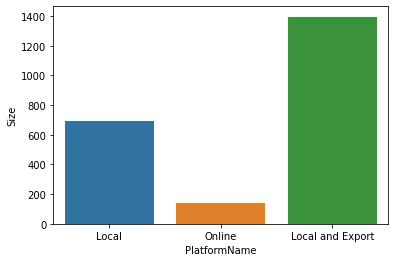

In [444]:
local = df_edit["kanal_cat"].value_counts()[0]
online =df_edit["kanal_cat"].value_counts()[1]
local_and_export = df_edit["kanal_cat"].value_counts()[2]

df_platform = pd.DataFrame([
      ["Local", local],
      ["Online", online],
      ["Local and Export", local_and_export]
    ], columns = ["PlatformName", "Size"])

sns.barplot(x = "PlatformName", y = "Size", data = df_platform)
plt.show()

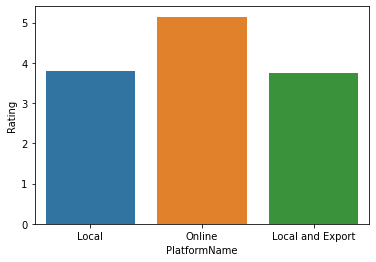

In [445]:
local_rat = df_edit[df_edit["kanal_cat"] == 0]["Rating"].mean()
online_rat = df_edit[df_edit["kanal_cat"] == 1]["Rating"].mean()
local_and_export_rat = df_edit[df_edit["kanal_cat"] == 2]["Rating"].mean()

df_platform_rating = pd.DataFrame([
      ["Local", local_rat],
      ["Online", online_rat],
      ["Local and Export", local_and_export_rat]
    ], columns = ["PlatformName", "Rating"])

sns.barplot(x = "PlatformName", y = "Rating", data = df_platform_rating)
plt.show()

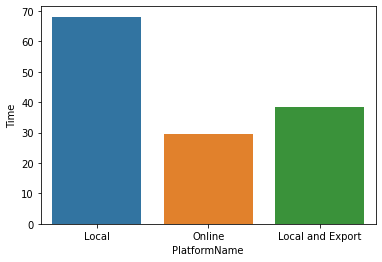

In [446]:
local_avg_t = df_edit[df_edit.kanal_cat == 0].Time.values[df_edit[df_edit.kanal_cat == 0].Time.values != ""]
online_avg_t = df_edit[df_edit.kanal_cat == 1].Time.values[df_edit[df_edit.kanal_cat == 1].Time.values != ""]
local_and_export_avg_t = df_edit[df_edit.kanal_cat == 2].Time.values[df_edit[df_edit.kanal_cat == 2].Time.values != ""]


df_platform_time = pd.DataFrame([
      ["Local", local_avg_t.mean()],
      ["Online", online_avg_t.mean()],
      ["Local and Export", local_and_export_avg_t.mean()]
    ], columns = ["PlatformName", "Time"])


sns.barplot(x = "PlatformName", y = "Time", data = df_platform_time)
plt.show()

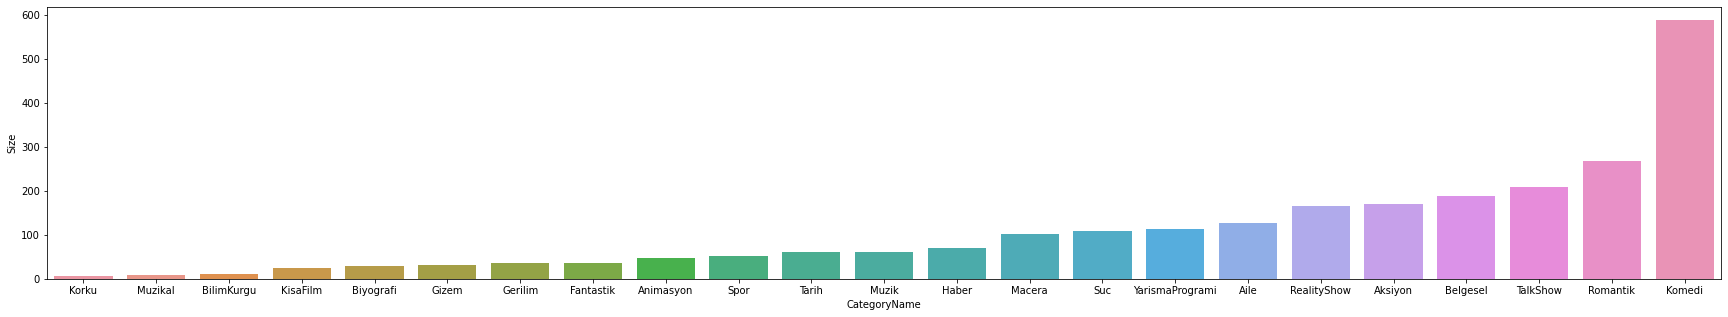

In [447]:
category_list = [
    ['Aksiyon', len(df_edit[df_edit.cat_Aksiyon == 1])],
    ['Macera', len(df_edit[df_edit.cat_Macera == 1])],
    ['Animasyon', len(df_edit[df_edit.cat_Animasyon == 1])],
    ['Biyografi', len(df_edit[df_edit.cat_Biyografi == 1])],
    ['Komedi', len(df_edit[df_edit.cat_Komedi == 1])],
    ['Suc', len(df_edit[df_edit.cat_Suc == 1])],
    ['Belgesel', len(df_edit[df_edit.cat_Belgesel == 1])],
    ['Aile', len(df_edit[df_edit.cat_Aile == 1])],
    ['Fantastik', len(df_edit[df_edit.cat_Fantastik == 1])],
    ['YarismaProgrami', len(
        df_edit[df_edit.cat_YarismaProgrami == 1])],
    ['Tarih', len(df_edit[df_edit.cat_Tarih == 1])],
    ['Korku', len(df_edit[df_edit.cat_Korku == 1])],
    ['Muzik', len(df_edit[df_edit.cat_Muzik == 1])],
    ['Muzikal', len(df_edit[df_edit.cat_Muzikal == 1])],
    ['Gizem', len(df_edit[df_edit.cat_Gizem == 1])],
    ['Haber', len(df_edit[df_edit.cat_Haber == 1])],
    ['RealityShow', len(df_edit[df_edit.cat_RealityShow == 1])],
    ['Romantik', len(df_edit[df_edit.cat_Romantik == 1])],
    ['BilimKurgu', len(df_edit[df_edit.cat_BilimKurgu == 1])],
    ['KisaFilm', len(df_edit[df_edit.cat_KisaFilm == 1])],
    ['Spor', len(df_edit[df_edit.cat_Spor == 1])],
    ['TalkShow', len(df_edit[df_edit.cat_TalkShow == 1])],
    ['Gerilim', len(df_edit[df_edit.cat_Gerilim == 1])]
]


df_category = pd.DataFrame(category_list, columns=[
                           'CategoryName', 'Size']).sort_values(by="Size")

plt.figure(figsize=(30, 5))
sns.barplot(x="CategoryName", y="Size", data=df_category)
plt.show()


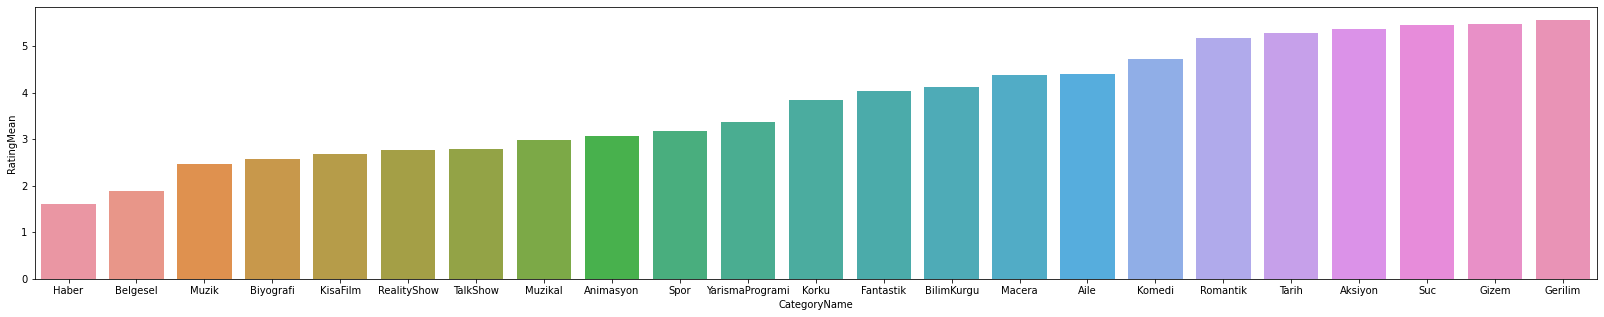

In [448]:
category_rating_list = [
                 ['Aksiyon', df_edit[df_edit.cat_Aksiyon == 1].Rating.mean()],
                 ['Macera', df_edit[df_edit.cat_Macera == 1].Rating.mean()],
                 ['Animasyon', df_edit[df_edit.cat_Animasyon == 1].Rating.mean()],
                 ['Biyografi', df_edit[df_edit.cat_Biyografi == 1].Rating.mean()],
                 ['Komedi', df_edit[df_edit.cat_Komedi == 1].Rating.mean()],
                 ['Suc', df_edit[df_edit.cat_Suc == 1].Rating.mean()],
                 ['Belgesel', df_edit[df_edit.cat_Belgesel == 1].Rating.mean()],
                 ['Aile', df_edit[df_edit.cat_Aile == 1].Rating.mean()],
                 ['Fantastik', df_edit[df_edit.cat_Fantastik == 1].Rating.mean()],
                 ['YarismaProgrami', df_edit[df_edit.cat_YarismaProgrami == 1].Rating.mean()],
                 ['Tarih', df_edit[df_edit.cat_Tarih == 1].Rating.mean()],
                 ['Korku', df_edit[df_edit.cat_Korku == 1].Rating.mean()],
                 ['Muzik', df_edit[df_edit.cat_Muzik == 1].Rating.mean()],
                 ['Muzikal', df_edit[df_edit.cat_Muzikal == 1].Rating.mean()],
                 ['Gizem', df_edit[df_edit.cat_Gizem == 1].Rating.mean()],
                 ['Haber', df_edit[df_edit.cat_Haber == 1].Rating.mean()],
                 ['RealityShow', df_edit[df_edit.cat_RealityShow == 1].Rating.mean()],
                 ['Romantik', df_edit[df_edit.cat_Romantik == 1].Rating.mean()],
                 ['BilimKurgu', df_edit[df_edit.cat_BilimKurgu == 1].Rating.mean()],
                 ['KisaFilm', df_edit[df_edit.cat_KisaFilm == 1].Rating.mean()],
                 ['Spor', df_edit[df_edit.cat_Spor == 1].Rating.mean()],
                 ['TalkShow', df_edit[df_edit.cat_TalkShow == 1].Rating.mean()],
                 ['Gerilim', df_edit[df_edit.cat_Gerilim == 1].Rating.mean()]
              ]
                 

df_category_mean_rating = pd.DataFrame(category_rating_list, columns=['CategoryName', 'RatingMean']).sort_values(by = "RatingMean")

plt.figure(figsize = (28, 5))
sns.barplot(x = "CategoryName", y = "RatingMean", data = df_category_mean_rating)
plt.show()

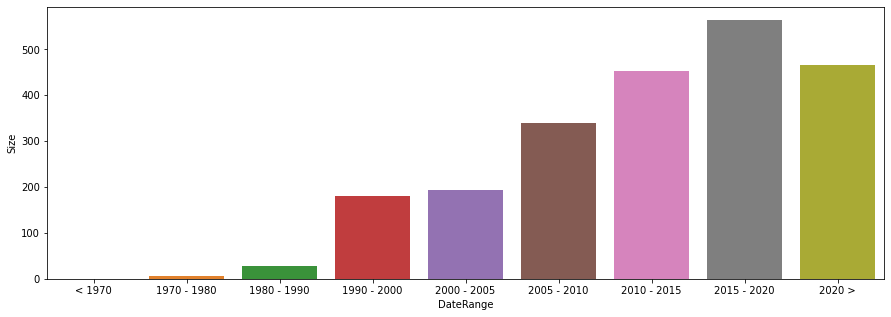

In [449]:
df_platform_time = pd.DataFrame([
      ["< 1970", len(df_edit[df_edit["baslangic_cat"] == 0])],
      ["1970 - 1980", len(df_edit[df_edit["baslangic_cat"] == 1])],
      ["1980 - 1990", len(df_edit[df_edit["baslangic_cat"] == 2])],
      ["1990 - 2000", len(df_edit[df_edit["baslangic_cat"] == 3])],
      ["2000 - 2005", len(df_edit[df_edit["baslangic_cat"] == 4])],
      ["2005 - 2010", len(df_edit[df_edit["baslangic_cat"] == 5])],
      ["2010 - 2015", len(df_edit[df_edit["baslangic_cat"] == 6])],
      ["2015 - 2020", len(df_edit[df_edit["baslangic_cat"] == 7])],
      ["2020 >", len(df_edit[df_edit["baslangic_cat"] == 8])]
    ], columns = ["DateRange", "Size"])

plt.figure(figsize = (15, 5))
sns.barplot(x = "DateRange", y = "Size", data = df_platform_time)

plt.show()

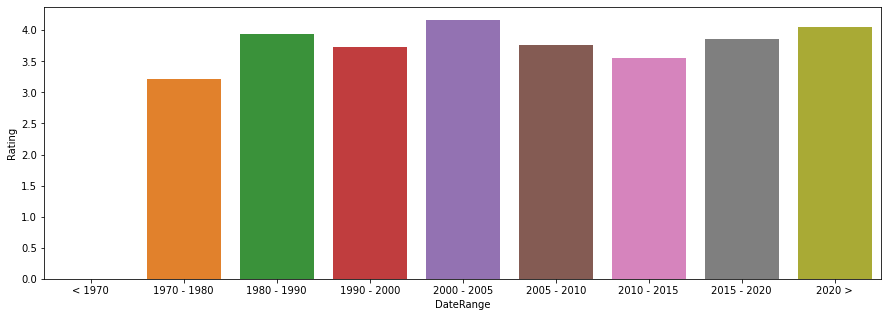

In [450]:
df_platform_rating = pd.DataFrame([
      ["< 1970", df_edit[df_edit["baslangic_cat"] == 0]["Rating"].mean()],
      ["1970 - 1980", df_edit[df_edit["baslangic_cat"] == 1]["Rating"].mean()],
      ["1980 - 1990", df_edit[df_edit["baslangic_cat"] == 2]["Rating"].mean()],
      ["1990 - 2000", df_edit[df_edit["baslangic_cat"] == 3]["Rating"].mean()],
      ["2000 - 2005", df_edit[df_edit["baslangic_cat"] == 4]["Rating"].mean()],
      ["2005 - 2010", df_edit[df_edit["baslangic_cat"] == 5]["Rating"].mean()],
      ["2010 - 2015", df_edit[df_edit["baslangic_cat"] == 6]["Rating"].mean()],
      ["2015 - 2020", df_edit[df_edit["baslangic_cat"] == 7]["Rating"].mean()],
      ["2020 >", df_edit[df_edit["baslangic_cat"] == 8]["Rating"].mean()]
    ], columns = ["DateRange", "Rating"])

plt.figure(figsize = (15, 5))
sns.barplot(x = "DateRange", y = "Rating", data = df_platform_rating)

plt.show()

#### [Go Contents Part](#main) 